In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fftpack, stats

In [2]:
# Filter parameters
srate   = 250 # hz
nyquist = srate/2
frange  = [7,12] # alpha band

### Evaluate DC Filter

In [3]:
# orders to evaluate
orders_range = range(0,8);

# generate the impulse 
impulse_resp = np.zeros(1001)
impulse_resp[501] = 1

kernX = np.zeros((len(orders_range),1001))
hz = np.linspace(0,srate,1001)

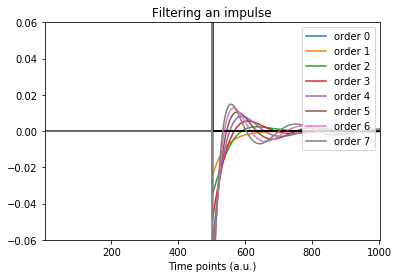

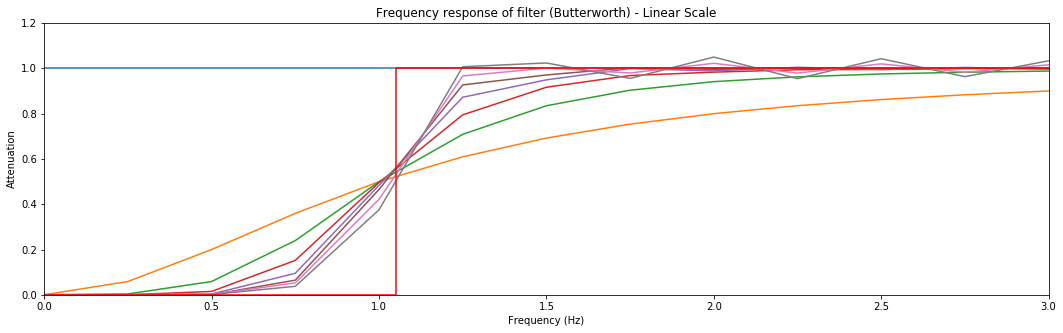

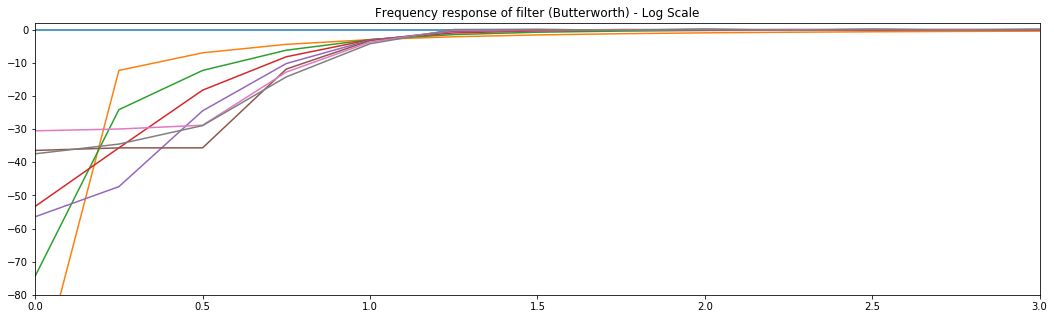

In [4]:
# loop over orders
for order in range(0,len(orders_range)):

    # create filter coefficients
    b_kern_dc, a_kern_dc = signal.butter(orders_range[order], 1.0/nyquist, btype="highpass")
    n = len(b_kern_dc)
    
    # apply the filter to impulse
    filt_impulse = signal.lfilter(b_kern_dc,a_kern_dc,impulse_resp,axis=-1)
    
    # apply FFT to impulse
    kernX[order,:] = np.abs(fftpack.fft(filt_impulse))**2
    
    # plot the filter coefficient over time
    time = np.arange(0,len(b_kern_dc))/srate
    time = time - np.mean(time)
    
    # plot the impulse response
    plt.plot(impulse_resp,'k')
    plt.plot(filt_impulse, label= 'order ' + str(order))
    plt.xlim([1,len(impulse_resp)])
    plt.ylim([-.06,.06])
    plt.xlabel('Time points (a.u.)')
    plt.title('Filtering an impulse')

plt.legend(loc=1) # location upper right
plt.show()

# plot the spectra
plt.figure(figsize=(18.0, 5.0))  # make new figure, set size in inches
plt.plot(hz,kernX.T)
plt.plot([0,1.05,1.05,nyquist],[0,0,1,1],'r')
plt.xlim([0,3])
plt.xlabel('Frequency (Hz)')
plt.ylim([0.0,1.2])
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth) - Linear Scale')

# in log space
plt.figure(figsize=(18.0, 5.0))  # make new figure, set size in inches
plt.plot(hz,10*np.log10(kernX.T))
plt.xlim([0,3])
plt.ylim([-80,2])
plt.title('Frequency response of filter (Butterworth) - Log Scale')

plt.show()

### Explore and Evaluate Bandpass Filter
Cours de traitement de signal sur le drive de PolyCortex

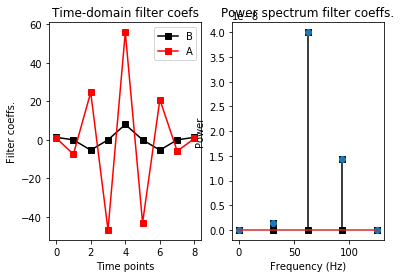

In [5]:
# create filter coefficients
fkernB,fkernA = signal.butter(4,np.array(frange)/nyquist,btype='bandpass')

# power spectrum of filter coefficients
filtpow = np.abs(fftpack.fft(fkernB))**2
hz      = np.linspace(0,srate/2,int(np.floor(len(fkernB)/2)+1))

# plotting
plt.subplot(121)
plt.plot(fkernB*1e5,'ks-',label='B')
plt.plot(fkernA,'rs-',label='A')
plt.xlabel('Time points')
plt.ylabel('Filter coeffs.')
plt.title('Time-domain filter coefs')
plt.legend()

plt.subplot(122)
plt.stem(hz,filtpow[0:len(hz)],'ks-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power spectrum filter coeffs.')
plt.show()


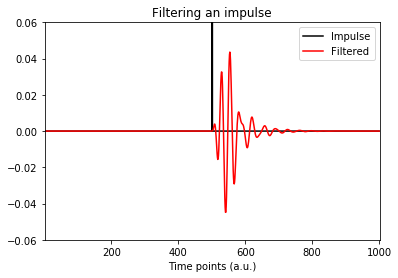

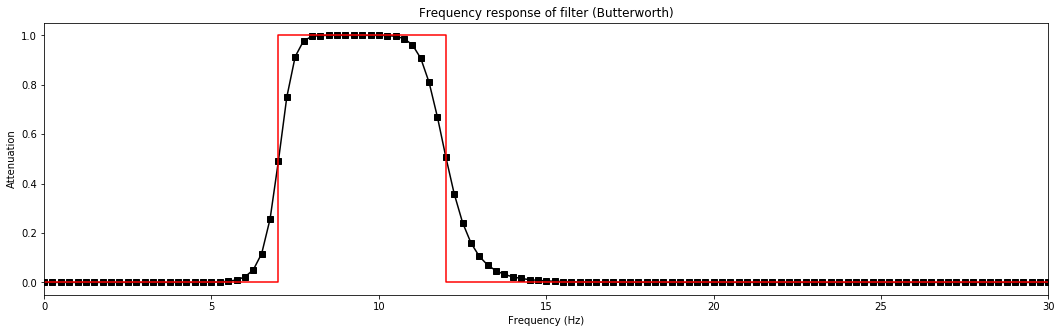

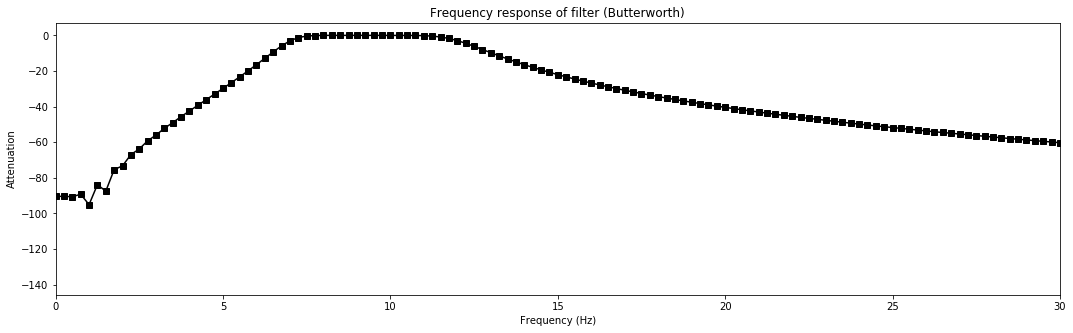

In [6]:
## how to evaluate an IIR filter: filter an impulse

# generate the impulse 
impres = np.zeros(1001)
impres[501] = 1

# apply the filter
fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)

# compute power spectrum
fimpX = np.abs(fftpack.fft(fimp))**2
hz = np.linspace(0,nyquist,int(np.floor(len(impres)/2)+1))

# plot
plt.plot(impres,'k',label='Impulse')
plt.plot(fimp,'r',label='Filtered')
plt.xlim([1,len(impres)])
plt.ylim([-.06,.06])
plt.legend()
plt.xlabel('Time points (a.u.)')
plt.title('Filtering an impulse')
plt.show()

plt.figure(figsize=(18.0, 5.0))  # make new figure, set size in inches
plt.plot(hz,fimpX[0:len(hz)],'ks-')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

plt.figure(figsize=(18.0, 5.0))  # make new figure, set size in inches
plt.plot(hz,10*np.log10(fimpX[0:len(hz)]),'ks-')
plt.xlim([0,30])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

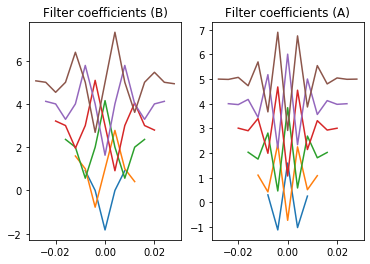

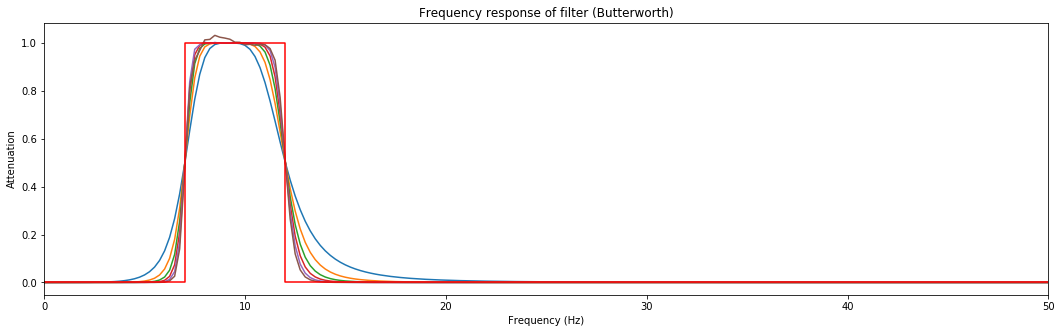

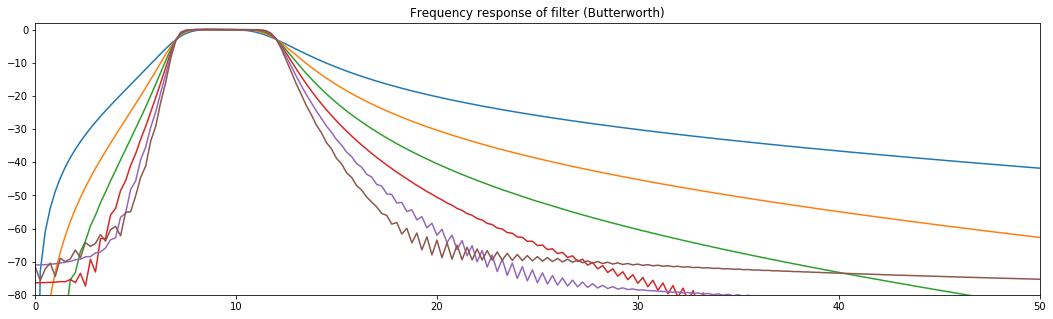

In [7]:
## effects of order parameter

orders = range(2,8)

fkernX = np.zeros((len(orders),1001))
hz = np.linspace(0,srate,1001)


# loop over orders
for oi in range(0,len(orders)):
    
    # create filter kernel
    fkernB,fkernA = signal.butter(orders[oi],np.array(frange)/nyquist,btype='bandpass')
    n = len(fkernB)
    
    # filter the impulse response and take its power
    fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)
    fkernX[oi,:] = np.abs(fftpack.fft(fimp))**2
    
    
    # show in plot
    time = np.arange(0,len(fkernB))/srate
    time = time - np.mean(time)
    plt.subplot(121)
    plt.plot(time,stats.zscore(fkernB)+oi)
    plt.title('Filter coefficients (B)')
    
    plt.subplot(122)
    plt.plot(time,stats.zscore(fkernA)+oi)
    plt.title('Filter coefficients (A)')

plt.show()


# plot the spectra
plt.figure(figsize=(18.0, 5.0))  # make new figure, set size in inches
plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,50])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

# in log space
plt.figure(figsize=(18.0, 5.0))  # make new figure, set size in inches
plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,50])
plt.ylim([-80,2])
plt.title('Frequency response of filter (Butterworth)')
plt.show()